In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

# Downloading/ Fetching the data

In [2]:
mnist = fetch_openml('mnist_784', version = 1) # it contains 70000 images of 28X28 pixel each

# taking the data into x and y

In [3]:
x = np.array(mnist['data'])
y = np.array(mnist['target'], dtype = np.int8)

# Plotting and seeing the data contents

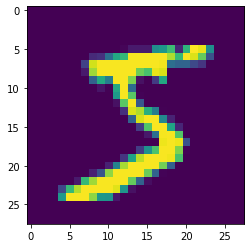

In [4]:
plt.imshow(x[0].reshape(28,28))         # reshape is to put 1 row, 784 columns to 28rows and 28 columns.
plt.show()

# Preparing the data for binary classifier

In [5]:
y_3 = (y == 3)

In [6]:
# Splitting the data into test train
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test, y_train, y_test,y_train_multi, y_test_multi = train_test_split(x,y_3,y, test_size= 0.2, random_state=42)

In [8]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [9]:
sgd_clf = SGDClassifier(random_state=42)
log_reg = LogisticRegression()

In [10]:
sgd_clf.fit(x_train,y_train)

SGDClassifier(random_state=42)

In [11]:
y_pred = sgd_clf.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
classification_report(y_test, y_pred, output_dict = True)

{'False': {'precision': 0.9915154569892473,
  'recall': 0.939205856608578,
  'f1-score': 0.9646520371051449,
  'support': 12567},
 'True': {'precision': 0.6354961832061069,
  'recall': 0.9295184926727146,
  'f1-score': 0.7548880702748655,
  'support': 1433},
 'accuracy': 0.9382142857142857,
 'macro avg': {'precision': 0.813505820097677,
  'recall': 0.9343621746406463,
  'f1-score': 0.8597700536900053,
  'support': 14000},
 'weighted avg': {'precision': 0.9550743413227301,
  'recall': 0.9382142857142857,
  'f1-score': 0.9431811967860171,
  'support': 14000}}

In [14]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, x_train,y_train, cv = 5, method = 'decision_function')

In [15]:
from sklearn.metrics import precision_recall_curve

In [16]:
precision, recall, threshold = precision_recall_curve(y_train, y_scores)

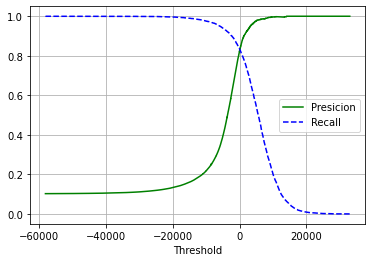

In [17]:
plt.plot(threshold, precision[:-1], 'g-', label = 'Presicion')
plt.plot(threshold, recall[:-1], 'b--', label = 'Recall')
plt.grid()
plt.xlabel('Threshold')
plt.legend()
plt.show()

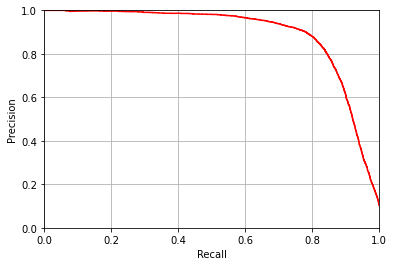

In [43]:
# plotting Precision vs recall
plt.plot(recall, precision, 'r-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.axis([0,1,0,1])
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score

In [46]:
accuracy = cross_val_score(sgd_clf, x_train,y_train, cv = 5, scoring = 'accuracy')
accuracy

array([0.96839286, 0.94767857, 0.97125   , 0.96901786, 0.96839286])

In [47]:
accuracy.mean()

0.9649464285714286

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

In [51]:
y_scores_log = cross_val_predict(log_reg, x_train, y_train, cv = 5 , method = 'decision_function')

/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

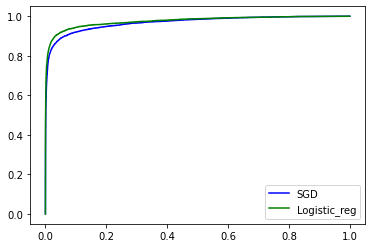

In [56]:
fpr,tpr, threshold = roc_curve(y_train, y_scores)
fpr_log, tpr_log, threshold_log = roc_curve(y_train, y_scores_log)
plt.plot(fpr, tpr, 'b-', label = 'SGD')
plt.plot(fpr_log, tpr_log, 'g-', label = 'Logistic_reg')
plt.legend()
plt.show()

In [59]:
sgd_roc_score = roc_auc_score(y_train,y_scores)
log_roc_score = roc_auc_score(y_train,y_scores_log)
log_roc_score, sgd_roc_score 

(0.9753078287691261, 0.9679608298468966)

# Multi class classification

In [21]:
sgd_multi = SGDClassifier()
sgd_multi.fit(x_train, y_train_multi)

SGDClassifier()

In [24]:
y_pred_multi = sgd_multi.predict(x_test)

In [26]:
classification_report(y_test_multi, y_pred_multi, output_dict = True)

{'0': {'precision': 0.9956331877729258,
  'recall': 0.8488458674609084,
  'f1-score': 0.9163987138263665,
  'support': 1343},
 '1': {'precision': 0.9700827498408657,
  'recall': 0.9525,
  'f1-score': 0.9612109744560077,
  'support': 1600},
 '2': {'precision': 0.8524930747922438,
  'recall': 0.8920289855072464,
  'f1-score': 0.8718130311614731,
  'support': 1380},
 '3': {'precision': 0.9746974697469747,
  'recall': 0.6182833217027216,
  'f1-score': 0.7566182749786508,
  'support': 1433},
 '4': {'precision': 0.9136577708006279,
  'recall': 0.8988416988416988,
  'f1-score': 0.9061891786687427,
  'support': 1295},
 '5': {'precision': 0.5592820028341994,
  'recall': 0.9300864100549883,
  'f1-score': 0.6985250737463128,
  'support': 1273},
 '6': {'precision': 0.9416484318016046,
  'recall': 0.9247851002865329,
  'f1-score': 0.9331405854716299,
  'support': 1396},
 '7': {'precision': 0.8997429305912596,
  'recall': 0.9314703925482368,
  'f1-score': 0.9153318077803204,
  'support': 1503},
 '8'

In [31]:
-np.log(0.9)

0.10536051565782628

# Iris Data Set

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()

In [35]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [70]:
data = iris["data"][:,2:]
target = iris['target']

In [71]:
data.max(), data.min()

(6.9, 0.1)

In [72]:
verginica = (target == 2)

In [73]:
log_reg_iris = LogisticRegression()
log_reg_iris.fit(data,verginica)

LogisticRegression()

In [74]:
x_new_1 = np.linspace(0,3,1000).reshape(1000,1)
x_new_2 = np.linspace(0,7,1000).reshape(1000,1)
x_new = np.c_[x_new_2,x_new_1]
y_pred_prob = log_reg_iris.predict_proba(x_new)

In [75]:
y_pred_prob[:10]

array([[9.99999976e-01, 2.39305339e-08],
       [9.99999975e-01, 2.45762806e-08],
       [9.99999975e-01, 2.52394523e-08],
       [9.99999974e-01, 2.59205192e-08],
       [9.99999973e-01, 2.66199641e-08],
       [9.99999973e-01, 2.73382830e-08],
       [9.99999972e-01, 2.80759851e-08],
       [9.99999971e-01, 2.88335936e-08],
       [9.99999970e-01, 2.96116456e-08],
       [9.99999970e-01, 3.04106926e-08]])

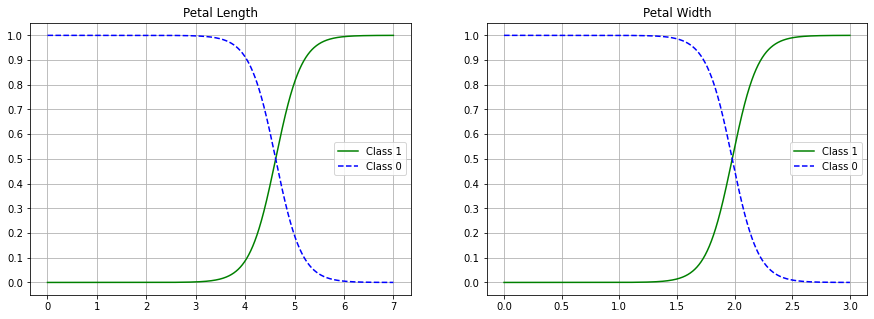

In [97]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(x_new[:,0],y_pred_prob[:,1], 'g-', label = 'Class 1')
plt.plot(x_new[:,0],y_pred_prob[:,0], 'b--', label = 'Class 0')
plt.yticks([x/10 for x in range(0,11)])
plt.legend()
plt.title('Petal Length')
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_new[:,1],y_pred_prob[:,1], 'g-', label = 'Class 1')
plt.plot(x_new[:,1],y_pred_prob[:,0], 'b--', label = 'Class 0')
plt.yticks([x/10 for x in range(0,11)])
plt.title('Petal Width')
plt.legend()
plt.grid()
plt.show()

In [101]:
# plotting the log loss for calss '0'
cost = -np.log(1-y_pred_prob[:,0])

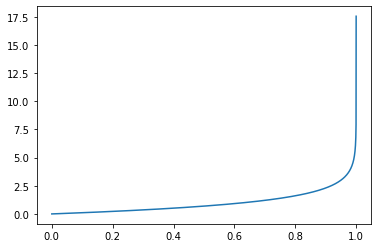

In [105]:
plt.plot(y_pred_prob[:,0],cost)
# plt.xticks([0,1])
plt.show()

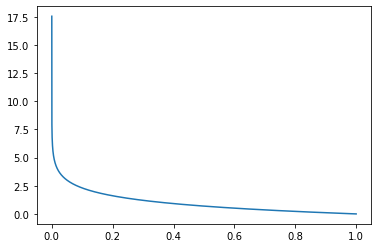

In [107]:
cost_1 = cost = -np.log(y_pred_prob[:,1])
plt.plot(y_pred_prob[:,1],cost_1)
# plt.xticks([0,1])
plt.show()